## Dataset Hakkında

* Pokemon.csv dosyasında pokemonların karakteristik özelliklerine yer verilmiştir.

### İlgili Kütüphanelerin import edilmesi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dosyayı import etmek

In [2]:
data = pd.read_csv("pokemon.csv")

### Dosyaya göz atmak için ilk 5 veriyi çekmek

In [3]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


### Dataseti ile ilgili temel bilgileri çekmek

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


* Dataset içerisinde 800 sample vardır.
* 12 tane feature bulunmaktadır.
* Name ve Type2 featurelarında eksik veriler bulunmaktadır.
* Legendary feature değerleri boolean; 
  Name,Type1,Type2 featureları string ve
  diğer featurelar integerdır.
* Dosya boyutu 69.7 KB büyüklüğündedir.

### Feature isimlerini çekmek

In [5]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### Korelasyon

* Featurelar arasındaki ilişkiyi anlamamızı sağlar.
* Eğer iki feature arasında korelasyon 1 ise bu iki feature arasında doğru orantı var demektir.

* Pozitif Correlatet : Bir evin oda sayısı artarsa fiyatı artar. Oda sayısı ve fiyat arası pozitif correlatet vardır. (1 veya 1'e yakınsa)

* Negatif Correlatet : Bir evin şehir merkezine olan uzaklığı arttıkça fiyatı düşer. Şehir merkezine uzaklık ve fiyat arası negatif correlatet vardır. (-1 veya yakın çıkarsa )

* Sıfır çıkan correlation ilişki yok demektir.

* corr() fonksiyonu bize featurelar arasındaki korelasyonu verir.

In [6]:
data.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


* Korelasyon bilgisi görselleştirilerek daha şık bir görüntü elde edilir.

* Korelasyon bilgisini görselleştirmek için seaborn kütüphanesine ait heatmap kullanılır.
 
* Bu görselleştirme işleminde kullanılan parametreler ; 
   - annot = True heat map içerisinde oranları göster demektir.

   - linewidths = .5 demek arasındaki line kalınlığını ayarlamayı sağlar.

   - fmt= '.1f' gösterilecek oran miktarlarının virgül sonrası 1 hane gösterilmesini sağlamaktır.

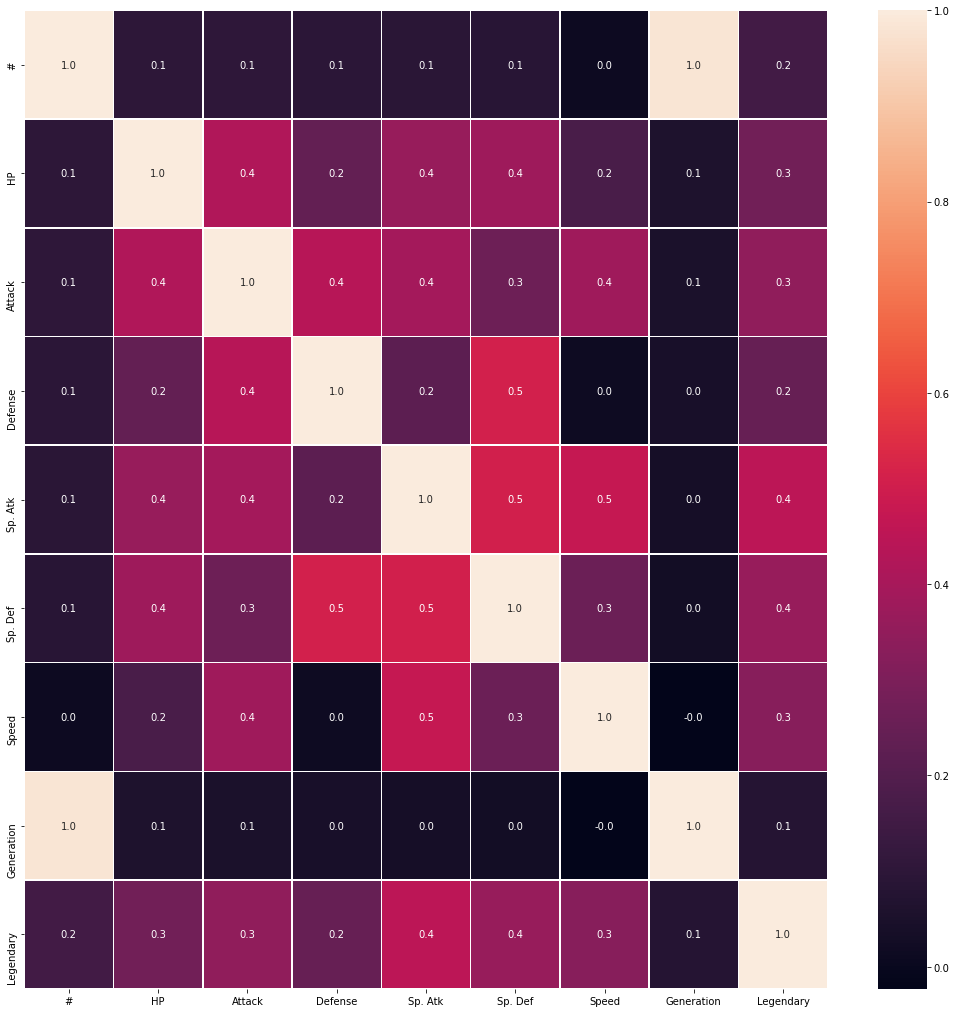

In [7]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(data.corr(), annot=True , linewidths = .5 , fmt= '.1f', ax=ax )
plt.show()

### Dataframe filtrelemek

* Dataset içerisinde bulunan pokemonlardan "Defense" özelliği 200 değerinden büyük olanlar koşulu filtreye atanır.

In [8]:
filtre = data['Defense']>200 

* Defense değeri 200'den büyük ve Attack değeri 130'dan büyük dataları filtreleme

In [9]:
filtre_2 = ((data["Defense"]>200) & (data["Attack"]>100))
data[filtre_2]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


* Efsane pokemonların isimlerinin çekilmesi

In [10]:
data[data["Legendary"] == True].Name

156          Articuno
157            Zapdos
158           Moltres
162            Mewtwo
163     Mega Mewtwo X
            ...      
795           Diancie
796      Mega Diancie
797    Hoopa Confined
798     Hoopa Unbound
799         Volcanion
Name: Name, Length: 65, dtype: object

* Efsane pokemonların sadece sayısını öğrenmek

In [11]:
data[data["Legendary"] == True].shape[0]

65

### Görselleştirme

* Line Plot : Eğer x ekseni zamansa kullanılması uygundur.

* Scatter Plot : İki feature arasında correlation olup olmadığını anlamak için kullanılması uygundur.

* Histogram Plot : Bir datanın distributionını yani sıklığını(frekansını) anlamak için kullanılması uygundur.

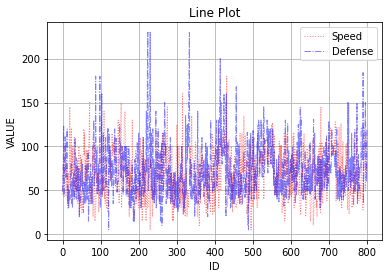

In [12]:
data.Speed.plot(kind="line", color="red", label="Speed", linewidth = 1 , alpha=0.5, grid =True ,linestyle=":")
data.Defense.plot(kind="line" , color="blue" , label="Defense" , linewidth=1 , alpha = 0.5 , grid = True , linestyle="-.")
plt.legend(loc="best")
plt.xlabel("ID")
plt.ylabel("VALUE")
plt.title("Line Plot")
plt.show()

* Defense ve Attack featureları arasındaki korelasyonu sezgisel olarak görmek için scatter plot ile görselleştirme yapılabilir.

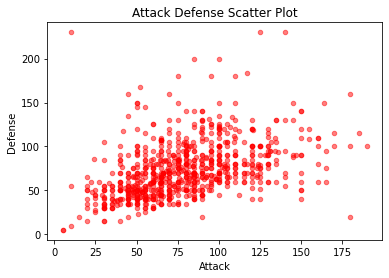

In [13]:
data.plot(kind="scatter",
        x="Attack",
        y="Defense",
        alpha=0.5,
        color="red")
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.title("Attack Defense Scatter Plot")
plt.show()

* Hız featurena ait değerlerin dağılımını incelemek için histogram çizdirmek

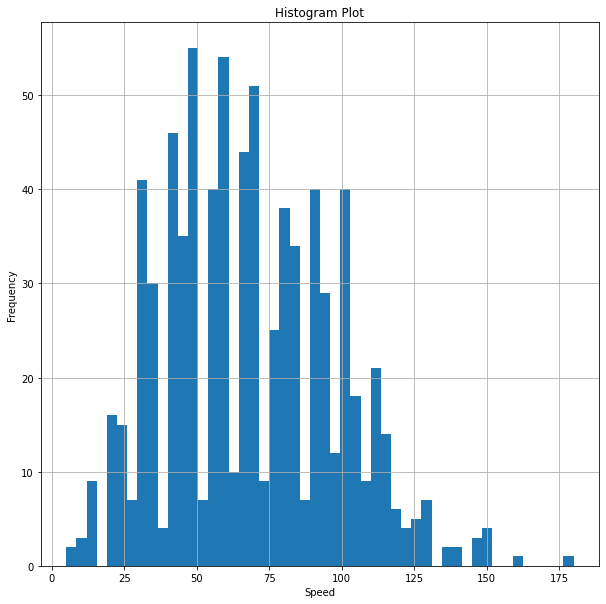

In [14]:
data.Speed.plot(kind="hist",bins=50,figsize=(10,10),grid=True)
plt.xlabel("Speed")
plt.title("Histogram Plot")
plt.show()